In [2]:
# Read Data
import pandas_datareader.data as web
from datetime import datetime, timedelta
import pandas as pd
import matplotlib.pyplot as plt
from arch import arch_model
from statsmodels.graphics.tsaplots import plot_pacf
import numpy as np

[*********************100%***********************]  1 of 1 completed


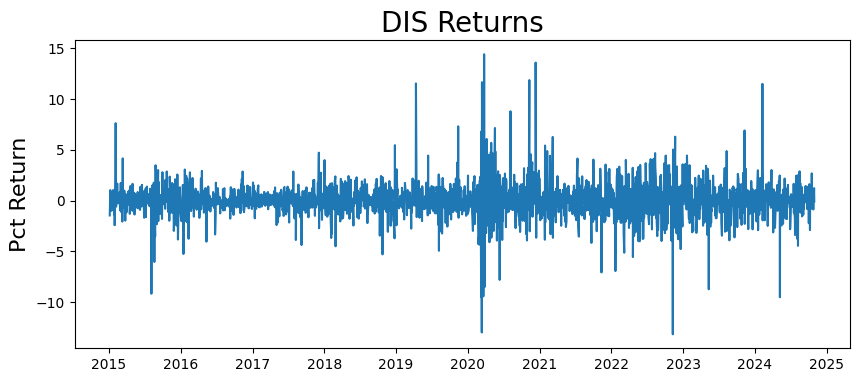

In [46]:
import yfinance as yf
from datetime import datetime

start = datetime(2015, 1, 1)
end = datetime(2024, 10, 30)

# Use yfinance to download the data
dis = yf.download('DIS', start=start, end=end)

# Calculate returns and plot
returns = 100 * dis['Close'].pct_change().dropna()
plt.figure(figsize=(10, 4))
plt.plot(returns)
plt.ylabel('Pct Return', fontsize=16)
plt.title('DIS Returns', fontsize=20)
plt.show()



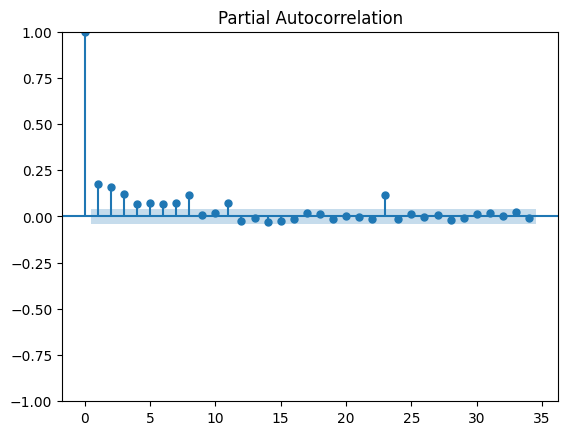

In [47]:
# PACF
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(returns**2)
plt.show()


In [48]:
# Try Arch(1,0)
model = arch_model(returns, p=1, q=0)
model_fit = model.fit()
model_fit.summary()

Iteration:      1,   Func. Count:      5,   Neg. LLF: 11684.1294067079
Iteration:      2,   Func. Count:     13,   Neg. LLF: 10566.244764681902
Iteration:      3,   Func. Count:     20,   Neg. LLF: 4915.050153489154
Iteration:      4,   Func. Count:     25,   Neg. LLF: 6799.619354760041
Iteration:      5,   Func. Count:     30,   Neg. LLF: 4928.039494013689
Iteration:      6,   Func. Count:     35,   Neg. LLF: 4812.224168894127
Iteration:      7,   Func. Count:     39,   Neg. LLF: 4812.174057676548
Iteration:      8,   Func. Count:     43,   Neg. LLF: 4812.172872787747
Iteration:      9,   Func. Count:     47,   Neg. LLF: 4812.172866829941
Iteration:     10,   Func. Count:     51,   Neg. LLF: 4812.1728655934185
Iteration:     11,   Func. Count:     54,   Neg. LLF: 4812.172865593324
Optimization terminated successfully    (Exit mode 0)
            Current function value: 4812.1728655934185
            Iterations: 11
            Function evaluations: 54
            Gradient evaluations: 

<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                    DIS   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -4812.17
Distribution:                  Normal   AIC:                           9630.35
Method:            Maximum Likelihood   BIC:                           9647.78
                                        No. Observations:                 2472
Date:                Mon, Nov 11 2024   Df Residuals:                     2471
Time:                        18:59:31   Df Model:                            1
                                  Mean Model                                 
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu             0.0305  3.294e-02      0.926      0.354 [-3.405e-02,9.509e-02]
                            Volatility Model                            
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
omega          2.4521      0.254      9.667  4.176e-22 [  1.955,  2.949]
alpha[1]       0.2075  5.164e-02      4.018  5.861e-05 [  0.106,  0.309]
========================================================================

Covariance estimator: robust
"""

In [49]:
# Try GARCH(1,1)
model = arch_model(returns, p=1, q=1)
model_fit = model.fit()
model_fit.summary()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 114025.80198985146
Iteration:      2,   Func. Count:     14,   Neg. LLF: 2757728.7190062264
Iteration:      3,   Func. Count:     21,   Neg. LLF: 5217.612328058045
Iteration:      4,   Func. Count:     29,   Neg. LLF: 4645.1154993386435
Iteration:      5,   Func. Count:     35,   Neg. LLF: 4983.509478113536
Iteration:      6,   Func. Count:     42,   Neg. LLF: 4640.701883250831
Iteration:      7,   Func. Count:     48,   Neg. LLF: 4638.015264262361
Iteration:      8,   Func. Count:     53,   Neg. LLF: 4638.012491967582
Iteration:      9,   Func. Count:     58,   Neg. LLF: 4638.0124878365605
Iteration:     10,   Func. Count:     62,   Neg. LLF: 4638.012487836019
Optimization terminated successfully    (Exit mode 0)
            Current function value: 4638.0124878365605
            Iterations: 10
            Function evaluations: 62
            Gradient evaluations: 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                    DIS   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -4638.01
Distribution:                  Normal   AIC:                           9284.02
Method:            Maximum Likelihood   BIC:                           9307.28
                                        No. Observations:                 2472
Date:                Mon, Nov 11 2024   Df Residuals:                     2471
Time:                        18:59:33   Df Model:                            1
                                  Mean Model                                  
==============================================================================
                  coef    std err          t      P>|t|       95.0% Conf. Int.
------------------------------------------------------------------------------
mu         -5.2246e-03  3.217e-02     -0.162      0.871 [-6.827e-02,5.782e-02]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.0604  5.505e-02      1.097      0.273 [-4.749e-02,  0.168]
alpha[1]       0.0712  4.075e-02      1.748  8.052e-02 [-8.651e-03,  0.151]
beta[1]        0.9135  5.017e-02     18.208  4.477e-74    [  0.815,  1.012]
===========================================================================

Covariance estimator: robust
"""

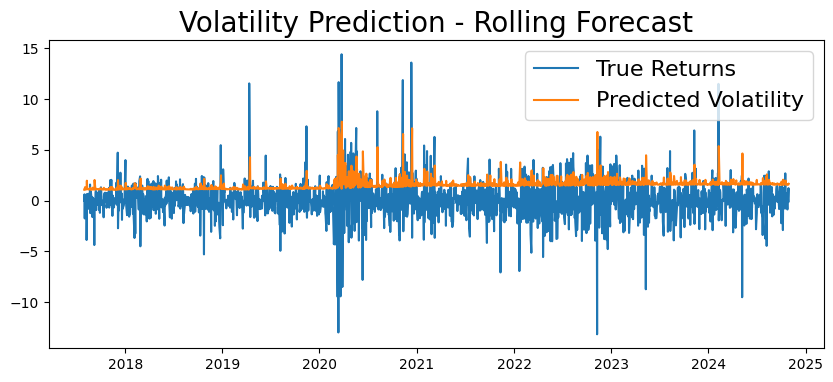

In [50]:
# Rolling Forcast
rolling_predictions = []
test_size = 365*5

for i in range(test_size):
    train = returns[:-(test_size-i)]
    model = arch_model(train, p=1, q=0)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))
rolling_predictions = pd.Series(rolling_predictions, index=returns.index[-365*5:])
plt.figure(figsize=(10,4))
true, = plt.plot(returns[-365*5:])
preds, = plt.plot(rolling_predictions)
plt.title('Volatility Prediction - Rolling Forecast', fontsize=20)
plt.legend(['True Returns', 'Predicted Volatility'], fontsize=16)

[*********************100%***********************]  1 of 1 completed


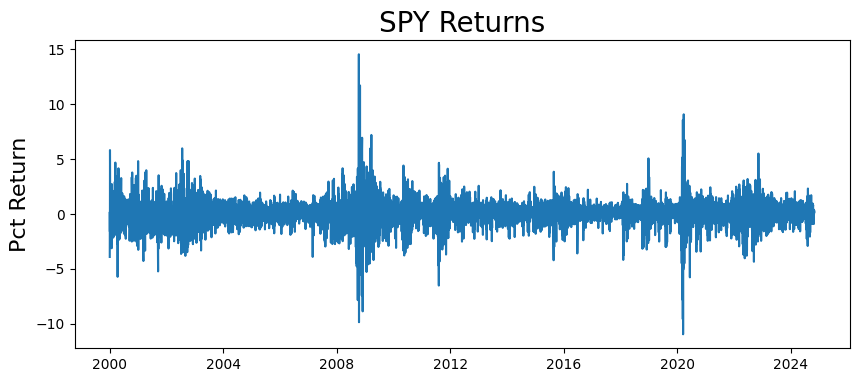

In [51]:
# SnP500 volatility
start = datetime(2000, 1, 1)
end = datetime(2024, 10, 30)

spy = yf.download('SPY', start=start, end=end)

# Calculate returns and plot
returns = 100 * spy.Close.pct_change().dropna()
plt.figure(figsize=(10, 4))
plt.plot(returns)
plt.ylabel('Pct Return', fontsize=16)
plt.title('SPY Returns', fontsize=20)
plt.show()

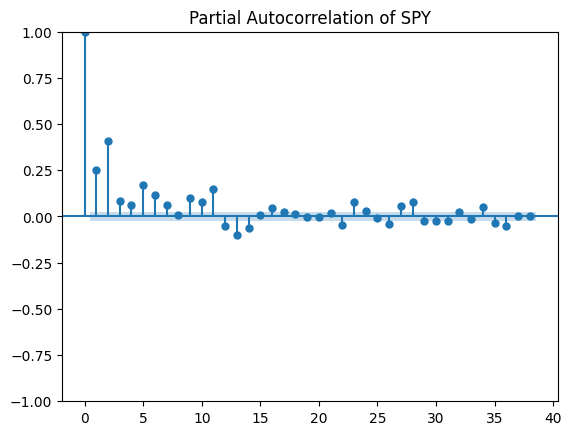

In [61]:
# PACF
plot_pacf(returns**2)
plt.title("Partial Autocorrelation of SPY")
plt.show()

In [53]:
# Try GARCH(2,2)
model = arch_model(returns, p=2, q=0)
model_fit = model.fit()
model_fit.summary()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 44055.861632615226
Iteration:      2,   Func. Count:     16,   Neg. LLF: 15032.141684013564
Iteration:      3,   Func. Count:     24,   Neg. LLF: 7424843.250829125
Iteration:      4,   Func. Count:     30,   Neg. LLF: 47223.616303772316
Iteration:      5,   Func. Count:     36,   Neg. LLF: 90786.0397080608
Iteration:      6,   Func. Count:     42,   Neg. LLF: 9251.902610096238
Iteration:      7,   Func. Count:     48,   Neg. LLF: 9134.935689360173
Iteration:      8,   Func. Count:     53,   Neg. LLF: 9128.841999985378
Iteration:      9,   Func. Count:     58,   Neg. LLF: 9127.777363715766
Iteration:     10,   Func. Count:     63,   Neg. LLF: 9127.58919727794
Iteration:     11,   Func. Count:     68,   Neg. LLF: 9127.57680066317
Iteration:     12,   Func. Count:     73,   Neg. LLF: 9127.573612451704
Iteration:     13,   Func. Count:     78,   Neg. LLF: 9127.573598451387
Iteration:     14,   Func. Count:     82,   Neg. LLF: 9127.57359

<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                    SPY   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -9127.57
Distribution:                  Normal   AIC:                           18263.1
Method:            Maximum Likelihood   BIC:                           18290.1
                                        No. Observations:                 6245
Date:                Mon, Nov 11 2024   Df Residuals:                     6244
Time:                        19:00:18   Df Model:                            1
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0719  1.236e-02      5.813  6.135e-09 [4.763e-02,9.608e-02]
                            Volatility Model                            
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
omega          0.5660  2.922e-02     19.373  1.303e-83 [  0.509,  0.623]
alpha[1]       0.2597  3.339e-02      7.777  7.436e-15 [  0.194,  0.325]
alpha[2]       0.3884  3.609e-02     10.760  5.317e-27 [  0.318,  0.459]
========================================================================

Covariance estimator: robust
"""

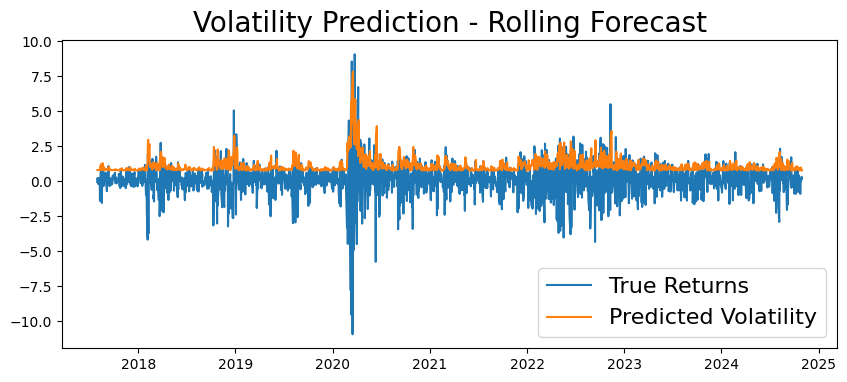

In [54]:
# Rolling Forcast
rolling_predictions = []
test_size = 365*5

for i in range(test_size):
    train = returns[:-(test_size-i)]
    model = arch_model(train, p=2, q=0)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))
rolling_predictions = pd.Series(rolling_predictions, index=returns.index[-365*5:])
plt.figure(figsize=(10,4))
true, = plt.plot(returns[-365*5:])
preds, = plt.plot(rolling_predictions)
plt.title('Volatility Prediction - Rolling Forecast', fontsize=20)
plt.legend(['True Returns', 'Predicted Volatility'], fontsize=16)

Text(0.5, 1.0, 'Volatility Prediction - Next 7 Days')

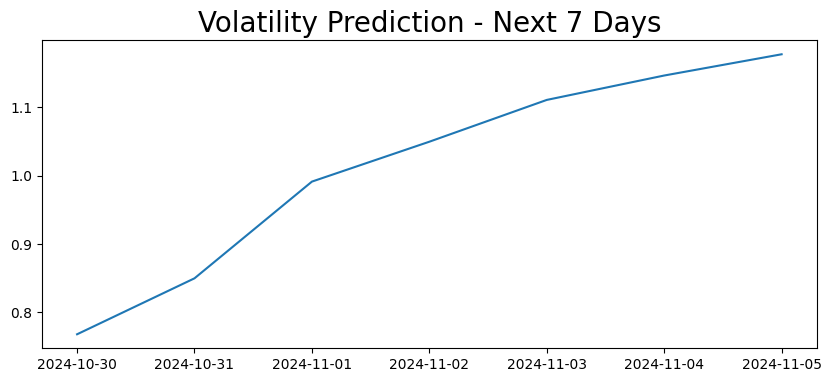

In [59]:
train = returns
model = arch_model(train, p=2, q=0)
model_fit = model.fit(disp='off')
pred = model_fit.forecast(horizon=7)
future_dates = [returns.index[-1] + timedelta(days=i) for i in range(1,8)]
pred = pd.Series(np.sqrt(pred.variance.values[-1,:]), index=future_dates)
plt.figure(figsize=(10,4))
plt.plot(pred)
plt.title('Volatility Prediction - Next 7 Days', fontsize=20)